<IPython.core.display.Javascript object>


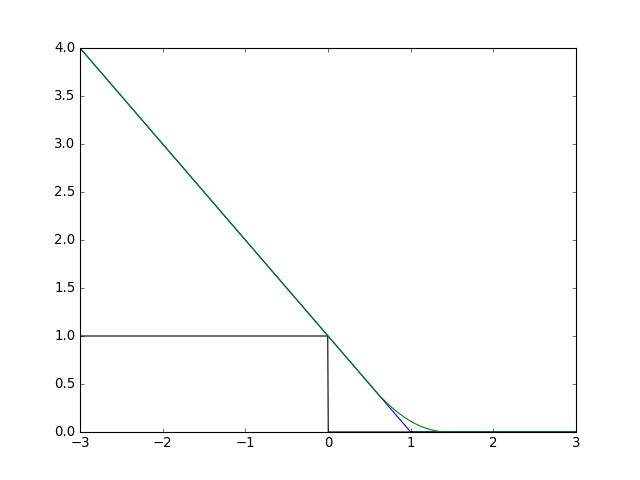

In [2]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np


#Hinge loss is Lh = max(0, 1-yt)

samples = np.linspace(-3, 3, 1000)
classification_point = 0;
h = 0.45

actual_classification = np.where(samples > 0, 1, -1)
predictions = np.ones(len(samples))

misclassification_error = actual_classification != predictions

hinge_loss = np.maximum(0, 1-(samples*predictions))

criteria = samples*predictions

hh_loss = np.where( criteria > (1+h), 0, np.where(criteria < (1 - h), 1 - criteria, ((1 +  h - criteria)**2)/(4*h)))

plt.plot(samples, hinge_loss, color='blue', label='Hinge')
plt.plot(samples, misclassification_error, color='black', label='Mis-class')
plt.plot(samples, hh_loss, color='green', label='Huber-hinge')
plt.show()

# Relation between huber-hinge, hinge and misclassification loss functions

The condition $ | 1 - yt | \le h $ in huber-hinge loss function determines the spread which has to be smoothened by the loss function ($ \frac{(1 + h - yt)^{2}}{4h} $) which is similar to squared loss function in the region determined by the value of h.

### The parameter h
As the value of h increases so does the spread of the smoothened curve.

### Differentiablity, convexity and smoothness
The huberized hinge loss gives a smooth, convex and differentiable upper bound for the misclassification error.  Whereas the hinge-loss gives a convex upper bound for the misclassification error.

### Upper bounds
The advantage of huberized hinge loss over other differentiable loss functions such as square loss is that we have a much tighter upper bound for huberized hinge loss than the squared loss functions.

# Proof of differentiability of huber-hinge loss function

The huber hinge loss function is given by 

$
\begin{align}
    l_{huber-hinge}(y,t) := & 
        \begin{cases}
            0 & \text{if } yt \gt 1 + h\\
            \frac{(1+h-yt)^{2}}{4h} & \text{if } | 1 - yt | \leq h\\
            1 - yt & \text{if } yt < 1 - h
        \end{cases}
\end{align} 
$

By rewriting the rhs for each cases in the above piecewise equation, we get the limits as 

$
\begin{align}
    l_{huber-hinge}(y,t) := & 
        \begin{cases}
            0 & \text{if } y \gt \frac{1 + h}{t}\\
            \frac{(1+h-yt)^{2}}{4h} & \text{if } \frac{1-h}{t} \leq y \leq \frac{1+h}{t} \\
            1 - yt & \text{if } y < \frac{1 - h}{t}
        \end{cases}
\end{align} 
$

For proving that the function is differentiable, we should show that the function is differentiable in all the three pieces.

The derivative for the function when $ y \gt \frac{1+h}{t} $ is clearly defined and has the value of zero.

The derivative for the function when $ y < \frac{1-h}{t} $ is clearly defined and has the value of -t.

The derivative for the function when $ \frac{1-h}{t} \leq y \leq \frac{1+h}{t} $ is clearly defined and has the value of $ \frac{-t(1+h-yt)}{2h} $ (easily diffentiable by chain rule)

We need to show that the function is differentiable at points $ \frac{1-h}{t} $ and $ \frac{1+h}{t} $

As $ y \to \frac{1-h}{t} $, the left side limit is given by the function 1 - yt.  When y = $\frac{1-h}{t}$, the left side derivative is h.  The right side derivative is given by $\frac{(1+h-yt)^{2}}{4h} $ which again gives the value of h.  So the function is differntiable at $ \frac{1-h}{t} $.

Similary, we can show that the function is differentiable at $ \frac{1+h}{t} $ as both the left side and right side limit will give the value of zero.

Since the piecewise function $ f(y,t) $ is differentiable at all the points, the function is differentiable as a whole.

# Analytic expression of gradient

The analytic expression of gradient is given by$
\begin{align}
    l_{huber-hinge}(y,t) := & 
        \begin{cases}
            0 & \text{if } yt \gt 1 + h\\
            \frac{-t(1+h-yt)}{2h} & \text{if } | 1 - yt | \leq h\\
            -t & \text{if } yt < 1 - h
        \end{cases}
\end{align} 
$



# Lipschitz continuousness of Huberized Loss function

We know that Huberized hinge loss is continuous as it is a differentiable function.

  * A function is $\rho$-Lipschitz if for every $ w_{1}, w_{2} \in C $ we have that $ \parallel f(w_{1}) - f(w_{2}) \parallel \leq  \rho\parallel w_{1} - w_{2} \parallel$
  
We are given a picewise function 

$
\begin{align}
    l_{huber-hinge}(y,t) := & 
        \begin{cases}
            0 & \text{if } yt \gt 1 + h\\
            \frac{(1+h-yt)^{2}}{4h} & \text{if } | 1 - yt | \leq h\\
            1 - yt & \text{if } yt \lt 1 - h
        \end{cases}
\end{align} 
$

We can show that the function is *Lipschitz-continuous* in all the three intervals.  

* $ \forall yt \gt 1 + h $, it is trivial to observe that the funciton is *Lipschitz-continuous* with $ \rho = 0 $. 
* $ \forall yt \lt 1 - h $, the function is linear and is *Lipschitz-continuous* for a value of $\rho=1$
* $ \forall \mid 1 - yt \mid \le h $, lets take $ z_{1}= yt_{1}, z_{2}=yt_{2} $

  $
  f(z_{1}) = \frac{ ((1+h)-z_{1})^{2}}{4h}
  $
  
  $
  f(z_{2}) = \frac{ ((1+h)-z_{2})^{2}}{4h}
  $
  
  $
  \begin{align}
  \parallel f(z_{1}) - f(z_{2}) \parallel =& \parallel \frac{ ((1+h)-z_{1})^{2}}{4h} - \frac{ ((1+h)-z_{2})^{2}}{4h} \parallel\\
  =& \parallel \frac{(1+h)^{2}+z_{1}^{2} - 2(1+h)(z_{1}) - (1+h)^{2}-z_{2}^{2} + 2(1+h)(z_{2}) }{4h} \parallel \\
  =& \parallel \frac{z_{1}^{2} - z_{2}^{2} -2(1+h)(z_{1} - z_{2})}{4h} \parallel \\
  =& \parallel \frac{(z_{1} - z_{2})(z_{1} + z_{2} - 2(1+h))}{4h} \parallel \\
  =& \parallel \frac{-(1 - z_{1})-(1 - z_{2}) - 2h}{4h}(z_{1} - z_{2}) \parallel \\
  =& \parallel K(z_{1} - z_{2})\parallel \\
  \end{align}
  $
  
  Where, K is the value of $\rho$ and ranges from -1 to zero.  (Since $ 1-z_{1}$ and $ 1 - z_{2}$ can take values between -h and h)

Thus the huberized hinge loss is a Lipschitz continuous function.